In [120]:
import pandas as pd
data = pd.read_csv("California_Houses.csv")
data.dropna(inplace=True)

In [121]:
X = data.drop(["Median_House_Value"], axis=1)
y=data['Median_House_Value']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
train_data=X_train.join(y_train)

In [124]:
train_data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Median_House_Value
819,3.7292,35,1931,376,1175,337,37.63,-122.07,7764.811592,526413.686022,705219.173471,36281.517539,35589.864131,168100.0
449,2.8676,46,1777,446,805,431,37.87,-122.28,5543.782801,558606.933163,737496.870435,68518.319497,17047.527598,212000.0
1086,1.6911,18,7272,1559,5022,1524,39.72,-121.85,165869.827351,706978.636588,884826.165017,265172.932737,222181.402637,98800.0
12060,2.3333,37,621,156,443,135,33.87,-117.57,42042.653709,65352.457372,133856.880763,548730.739852,616702.259329,122800.0
10226,5.6409,35,1919,349,1302,345,33.87,-117.88,24769.301335,39187.167142,144698.871685,529155.279469,597188.901702,190900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18155,8.0599,31,1795,281,872,282,37.35,-122.06,14293.271309,503110.755832,681311.192718,14848.749700,57389.753597,381800.0
1312,5.6779,16,2919,462,1456,453,37.99,-121.83,10444.932468,543719.760357,723110.821769,72990.453372,57981.755570,164700.0
12721,7.3343,37,2839,390,1006,400,38.58,-121.37,59499.618294,576040.615058,754650.222948,145783.098432,128990.065788,280400.0
1270,3.2813,33,2396,452,1391,465,37.96,-121.70,8368.961634,534194.159832,713603.377072,71492.664609,67444.544608,151400.0


array([[<Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>,
        <Axes: title={'center': 'Tot_Bedrooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>,
        <Axes: title={'center': 'Distance_to_SanJose'}>],
       [<Axes: title={'center': 'Distance_to_SanFrancisco'}>,
        <Axes: title={'center': 'Median_House_Value'}>, <Axes: >,
        <Axes: >]], dtype=object)

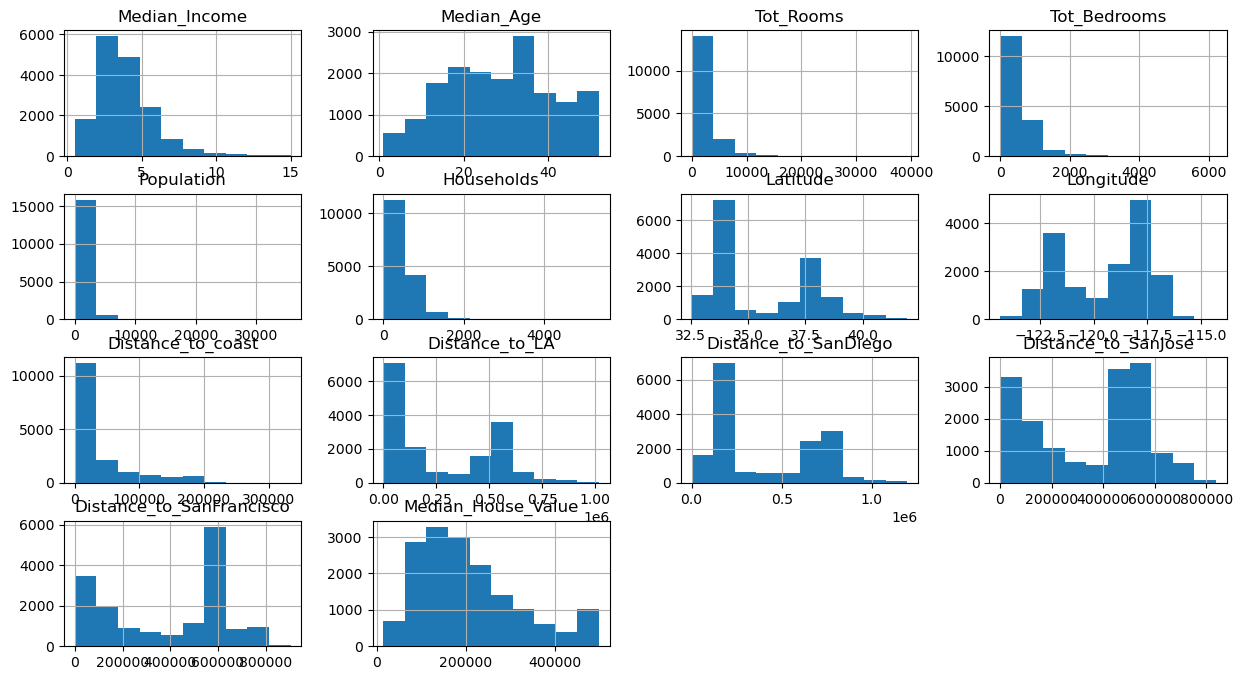

In [125]:
train_data.hist(figsize=(15,8))

<Axes: >

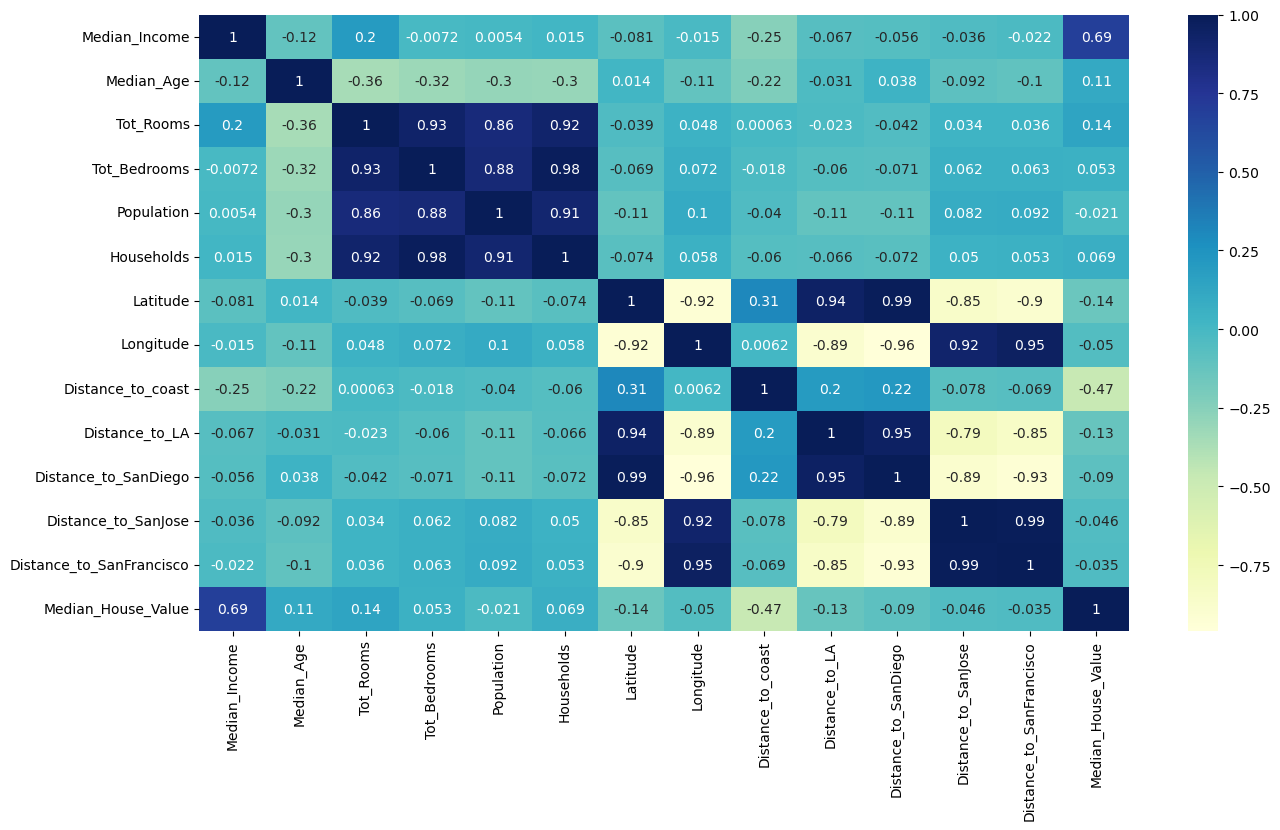

In [126]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [127]:
train_data['Tot_Rooms']=np.log(train_data['Tot_Rooms']+1)
train_data['Tot_Bedrooms']=np.log(train_data['Tot_Bedrooms']+1)
train_data['Households']=np.log(train_data['Households']+1)
train_data['Population']=np.log(train_data['Population']+1)

array([[<Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>,
        <Axes: title={'center': 'Tot_Bedrooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>,
        <Axes: title={'center': 'Distance_to_SanJose'}>],
       [<Axes: title={'center': 'Distance_to_SanFrancisco'}>,
        <Axes: title={'center': 'Median_House_Value'}>, <Axes: >,
        <Axes: >]], dtype=object)

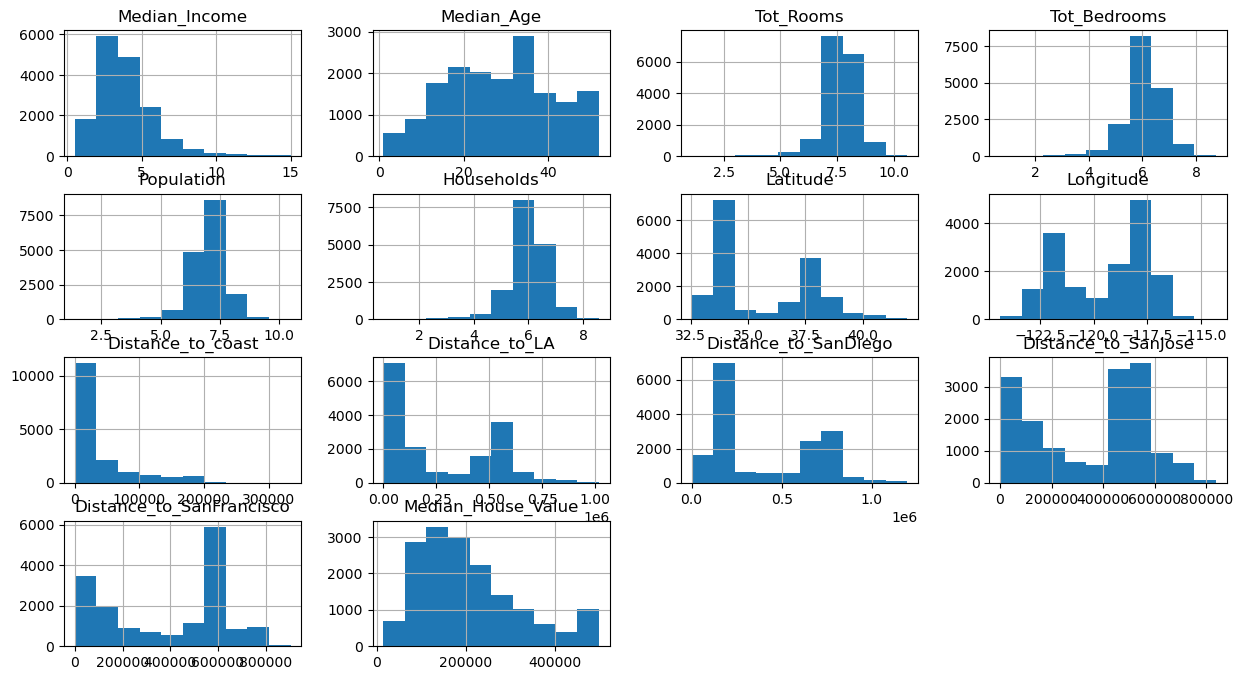

In [128]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='Latitude', ylabel='Longitude'>

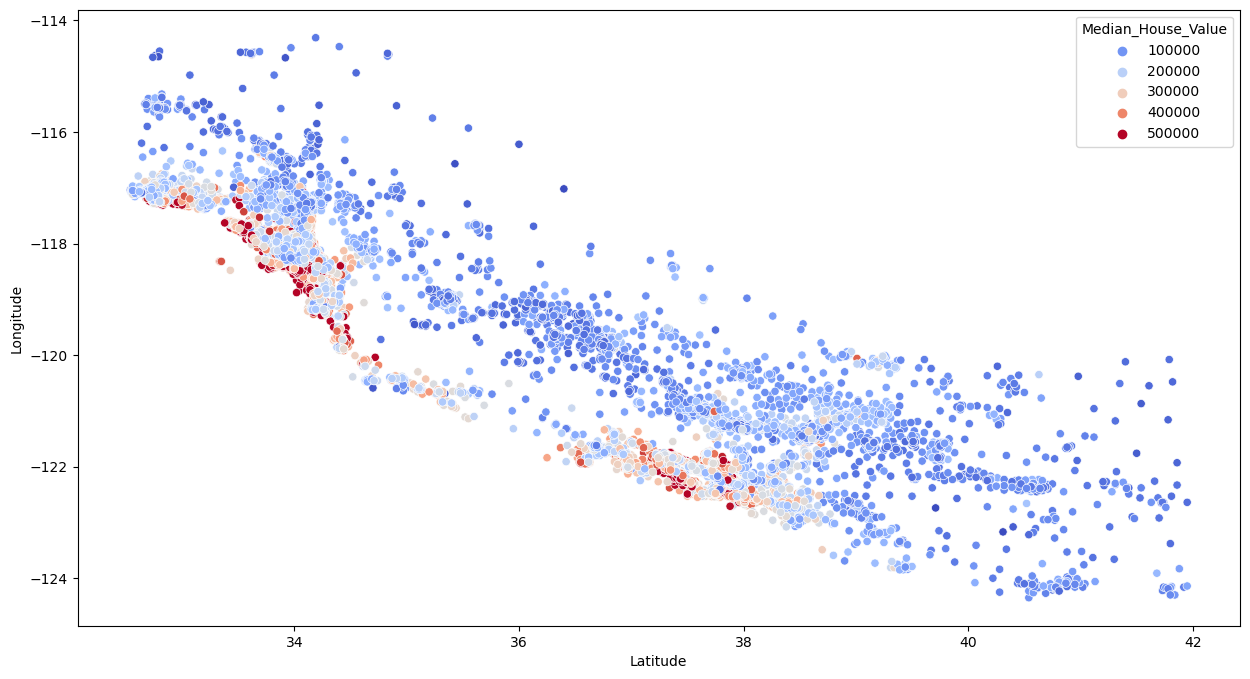

In [129]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Latitude",y="Longitude", data=train_data,hue="Median_House_Value",palette="coolwarm")

In [130]:
train_data["bedroom_ratio"]=train_data["Tot_Bedrooms"]/train_data["Tot_Rooms"]
train_data["household_rooms"]=train_data["Tot_Rooms"]/train_data["Households"]


<Axes: >

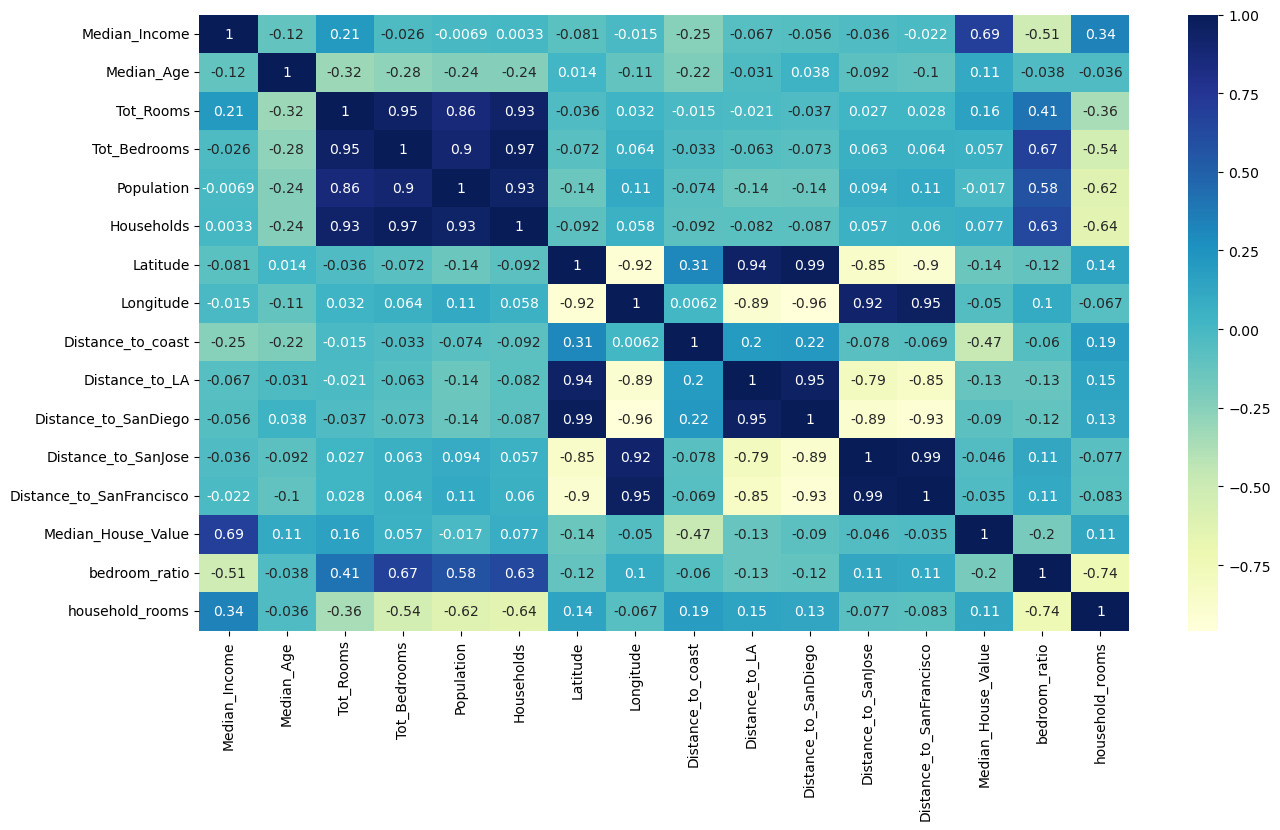

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [132]:
from sklearn.linear_model import LinearRegression

X_train,y_train = train_data.drop(["Median_House_Value"],axis=1),train_data["Median_House_Value"]

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [133]:
test_data= X_test.join(y_test)

test_data['Tot_Rooms']=np.log(test_data['Tot_Rooms']+1)
test_data['Tot_Bedrooms']=np.log(test_data['Tot_Bedrooms']+1)
test_data['Households']=np.log(test_data['Households']+1)
test_data['Population']=np.log(test_data['Population']+1)

test_data["bedroom_ratio"]=test_data["Tot_Bedrooms"]/test_data["Tot_Rooms"]
test_data["household_rooms"]=test_data["Tot_Rooms"]/test_data["Households"]


In [134]:
X_test,y_test = test_data.drop(["Median_House_Value"],axis=1),test_data["Median_House_Value"]

In [135]:
reg.score(X_test,y_test)

0.6583255027050801

In [143]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [144]:
forest.score(X_test,y_test)

0.8212610710953872

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300, 400], 
    "min_samples_split": [2, 4],  
    "max_depth": [None, 4, 8]  
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)